In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [2]:
from get_clean_data_DTR import get_data, clean_data, get_feats, get_target, partition_feats_by_ptp_cnt, partition_more_feats_by_ptp_cnt
from plot_results_and_residuals import plot_results, plot_residuals, plot_student_residuals

<h3>Variable List: </h3>
<ul><li>model_dict : Dictionary of linear regression models fit with 2014 data divided by plan participant count
<li>partitioned_dict_of_df_XX : Dictionary of tuples:<br>X (features matrix): Pandas dataframes of 20XX plan features divided by plan participant count, <br>y (target series): Pandas Series of 20XX+1 actual funding target 
<li>predict_dict_XX : Dictionary of predicted 20XX+1 funding targets (predicted off 20XX features)
<li>student_resids_XX : Dictionary of studentized residuals

<h1>Get training data: 2014 Schedule SB, H and Form 5500 filing fields </h1>
<h3>In dictionary with keys = participant count range (partitions)</h3>

<h3>Features:</h3>
    <ul><li>Prior year funding target
        <li>Prior year target normal cost (expected growth in funding target)
        <li>Prior year benefits paid
        <li>Prior year effective interest rate (single effective rate that approximates the effect of 3-tiered rates actually used to value funding target
    </ul>
<h3>Interaction Features:</h3>
    <ul><li>Effective interst rate x prior year funding target
        <li>Effective interst rate x prior year target normal cost (expected growth in funding target)
        <li>Effective interst rate x prior year benefits paid (1/2 year)
    </ul>

In [3]:
partitioned_dict_of_df_14 = partition_feats_by_ptp_cnt(2014)

In [4]:
partitioned_dict_of_df_14_more = partition_more_feats_by_ptp_cnt(2014)

In [5]:
partition_list = [(0,300),(300,500),(500,800),(800,1500),(1500,2500),(2500,5000),(5000,10000),(10000,50000),(50000,100000),(100000,500000)]

<b>Number of plans in each partition of data</b>:

In [6]:
for i in partition_list:
    print('{} :'.format(i),len(partitioned_dict_of_df_14[i][0]))

(0, 300) : 1500
(300, 500) : 704
(500, 800) : 593
(800, 1500) : 712
(1500, 2500) : 482
(2500, 5000) : 504
(5000, 10000) : 369
(10000, 50000) : 311
(50000, 100000) : 51
(100000, 500000) : 28


In [7]:
for i in partition_list:
    print('{} :'.format(i),len(partitioned_dict_of_df_14_more[i][0]))

(0, 300) : 1500
(300, 500) : 704
(500, 800) : 593
(800, 1500) : 712
(1500, 2500) : 482
(2500, 5000) : 504
(5000, 10000) : 369
(10000, 50000) : 311
(50000, 100000) : 51
(100000, 500000) : 28


<h1>Create dictionary of linear models (OLS) fitted on 2014 partitioned data</h1>

In [8]:
model_dict = {}
for i in partition_list:
    X, y = partitioned_dict_of_df_14[i]
    model_dict[i] = DecisionTreeRegressor().fit(X, y)
    print(model_dict[i].score(X,y))

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


<h1>Test on 2015 data:</h1>
<ul>
    <li>Get data
    <li>create dictionary of predictions
    <li>graph actual values vs predictions
    </ul>

In [9]:
partitioned_dict_of_df_15 = partition_feats_by_ptp_cnt(2015)

In [10]:
partitioned_dict_of_df_15_more = partition_more_feats_by_ptp_cnt(2015)

<b>Distribution of plan sizes</b>

In [11]:
for i in partition_list:
    print('{} :'.format(i),len(partitioned_dict_of_df_15[i][0]))

(0, 300) : 1466
(300, 500) : 672
(500, 800) : 568
(800, 1500) : 675
(1500, 2500) : 460
(2500, 5000) : 488
(5000, 10000) : 348
(10000, 50000) : 306
(50000, 100000) : 50
(100000, 500000) : 28


In [12]:
predict_dict_15 = {}
for i in partition_list:
    X, y = partitioned_dict_of_df_15[i]
    predict_dict_15[i] = model_dict[i].predict(X)

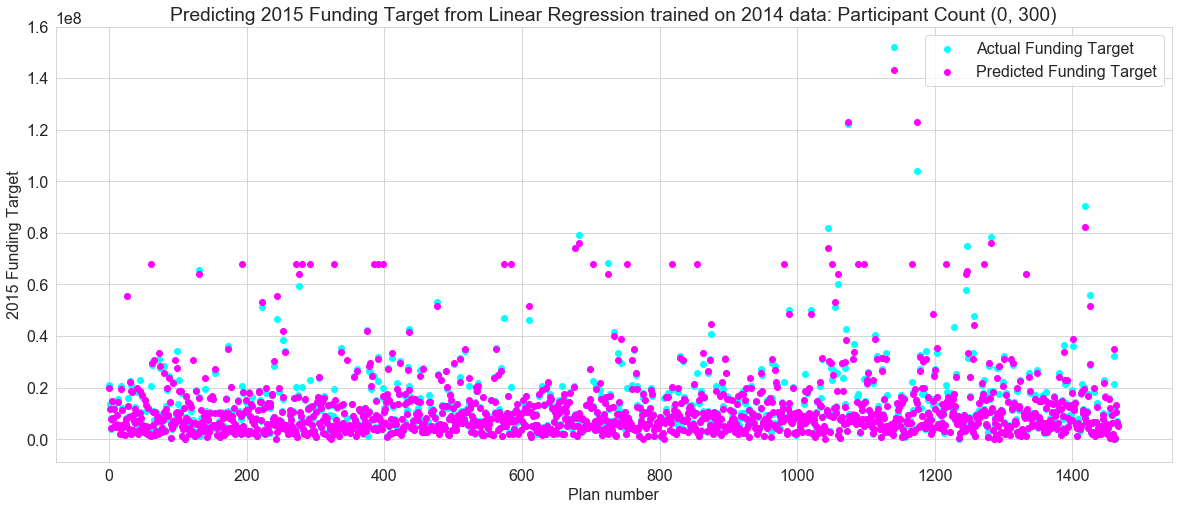

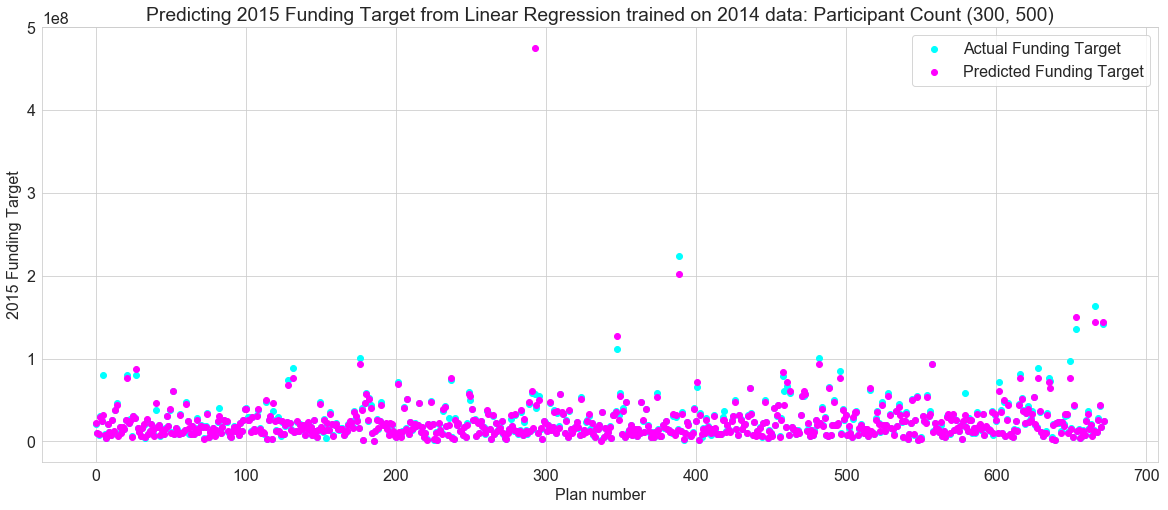

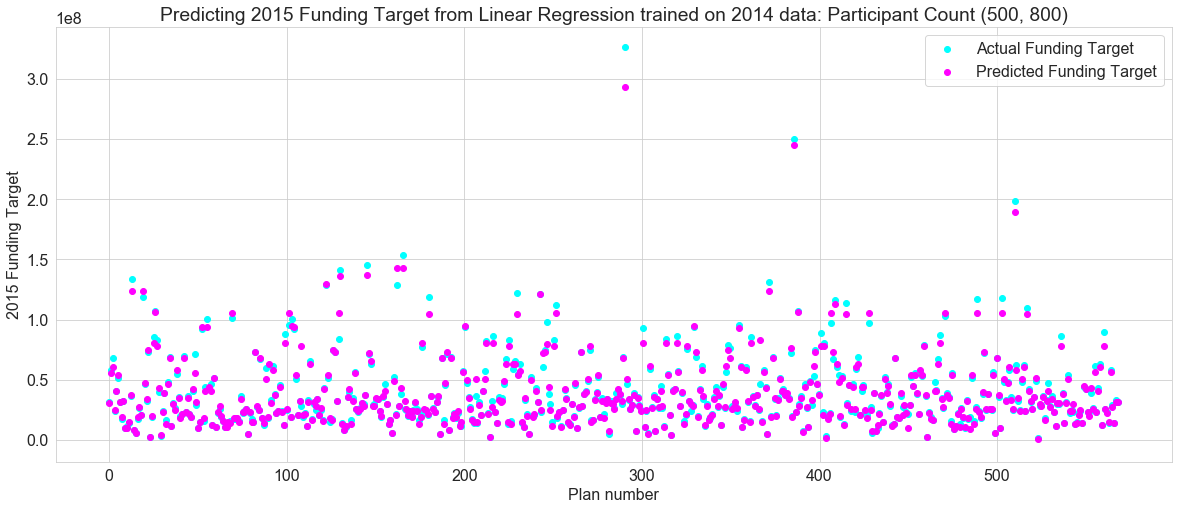

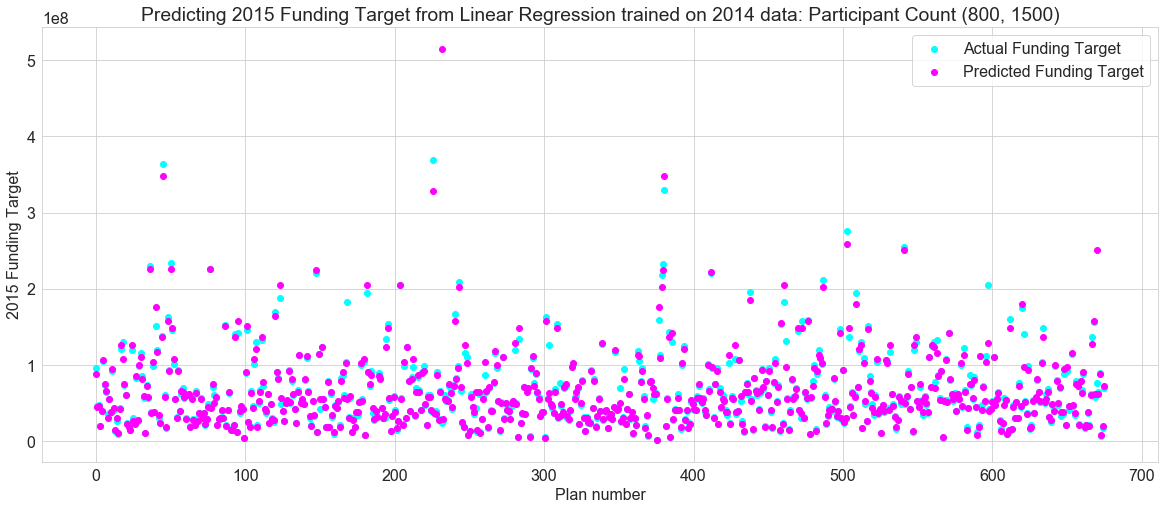

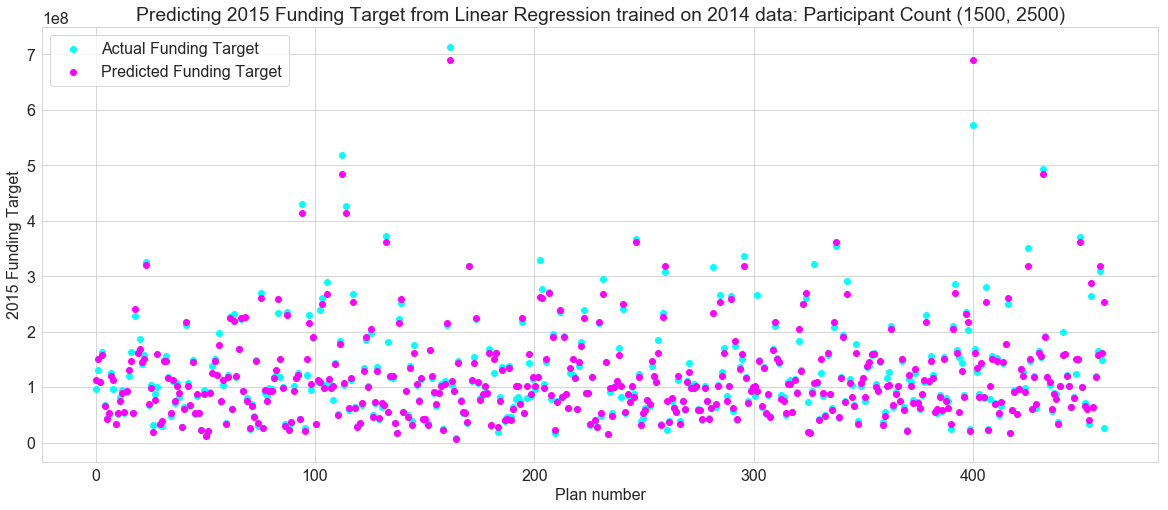

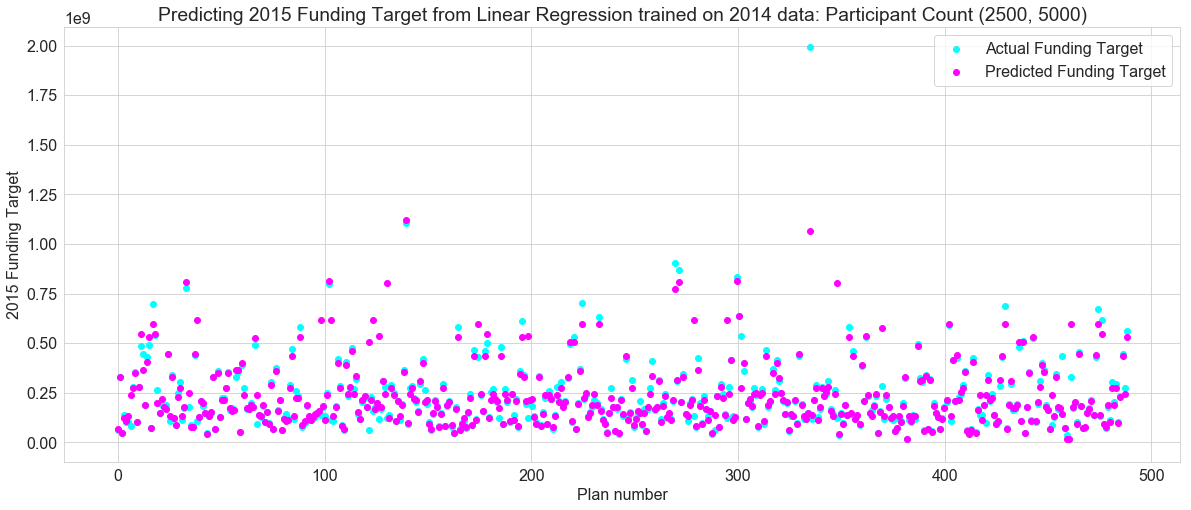

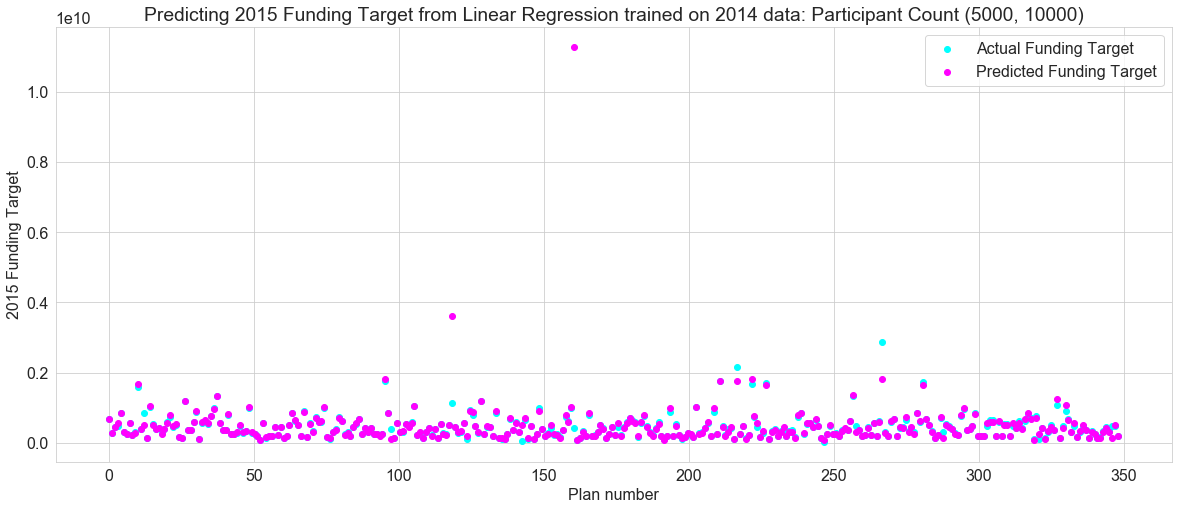

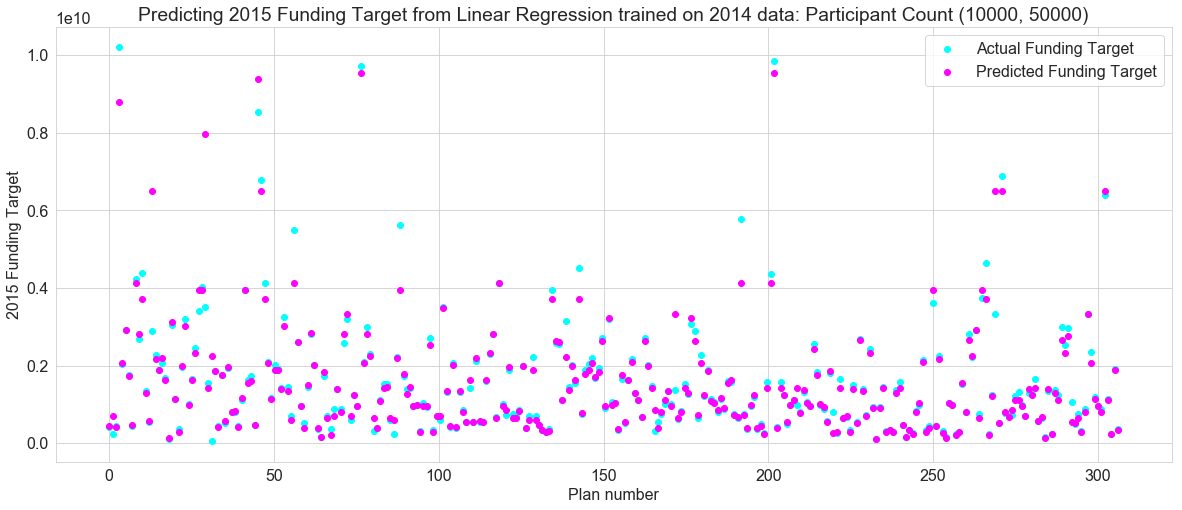

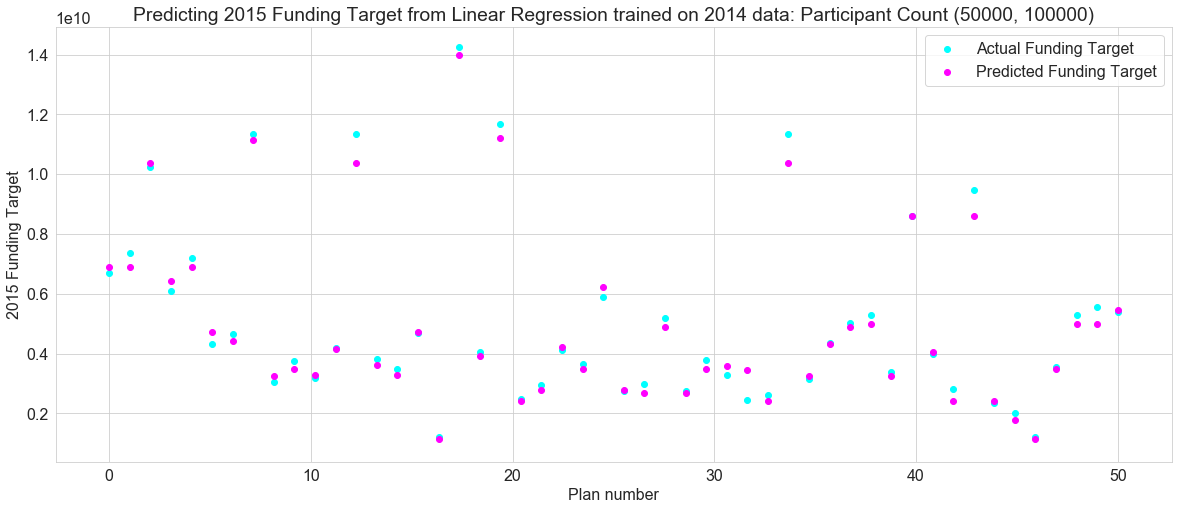

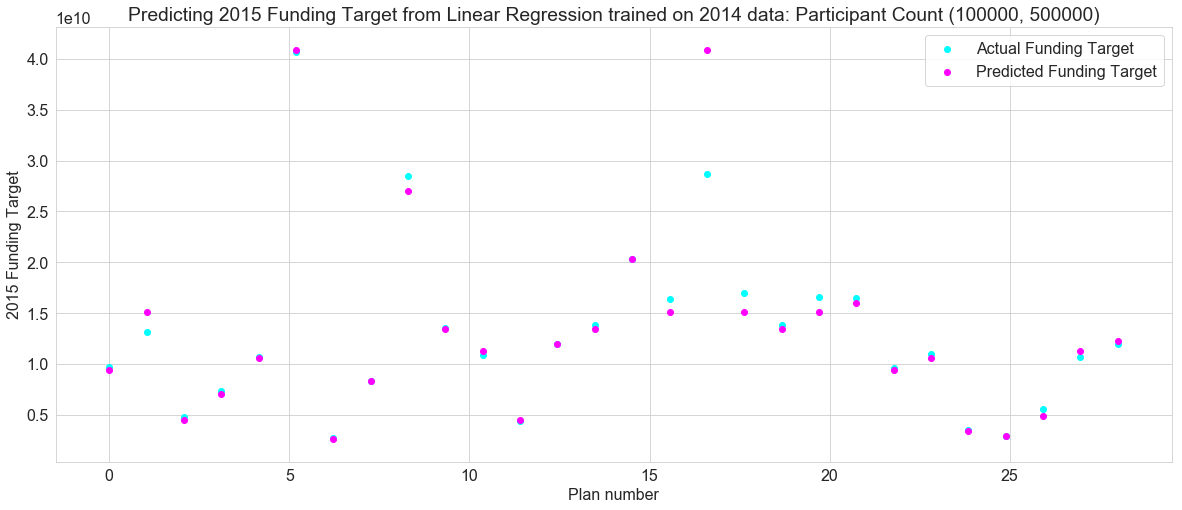

In [13]:
for i in partition_list:
    y_true = partitioned_dict_of_df_15[i][1]
    y_pred = predict_dict_15[i]
    plot_results(y_true, y_pred, i, 2015)

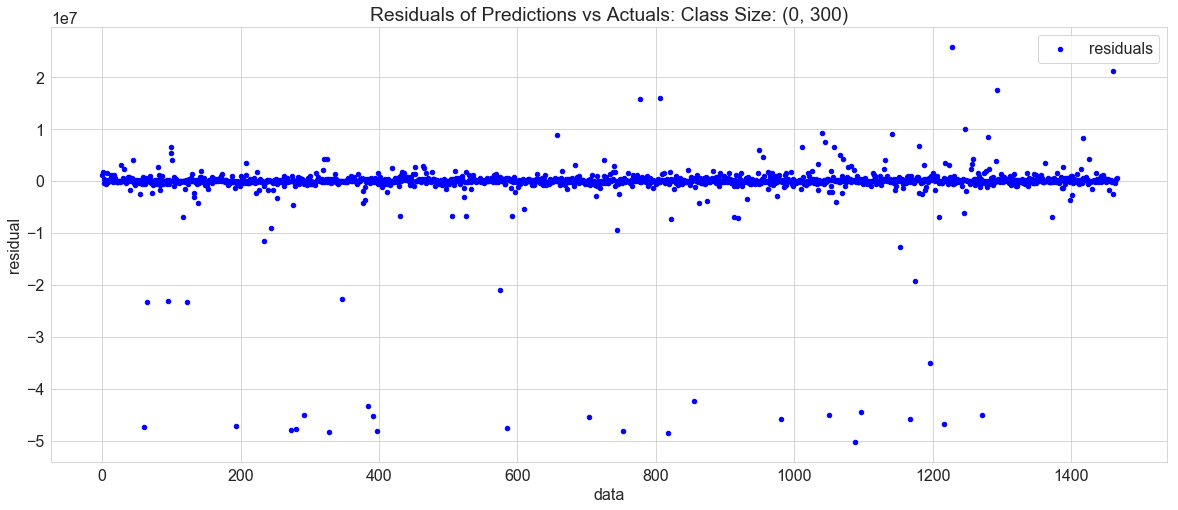

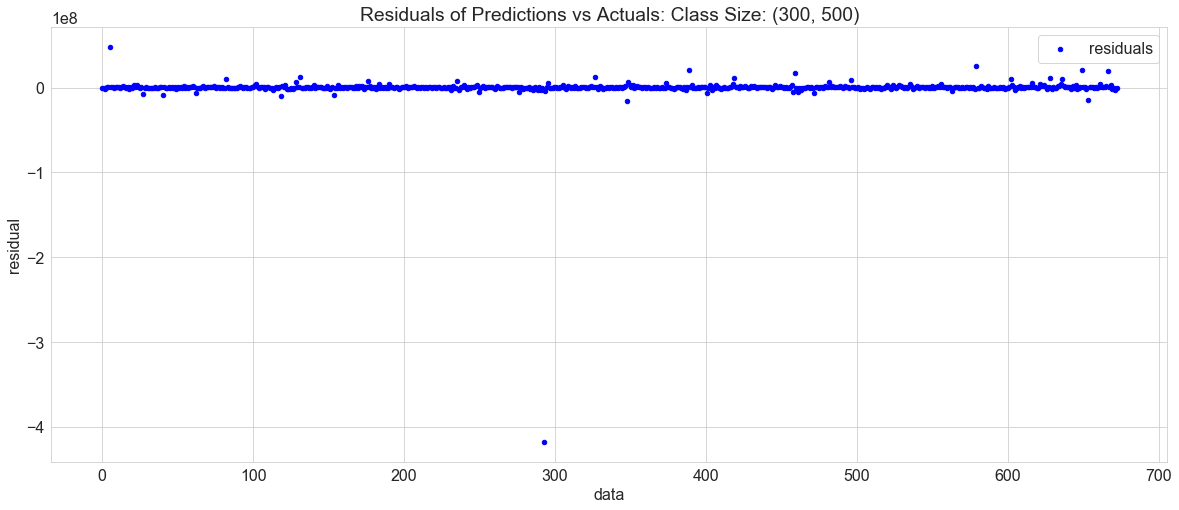

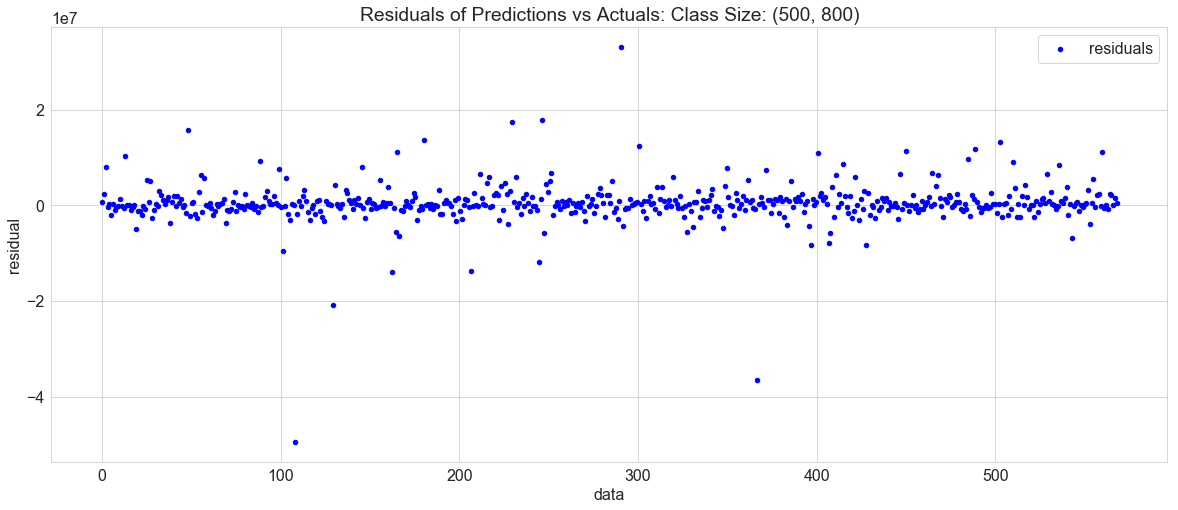

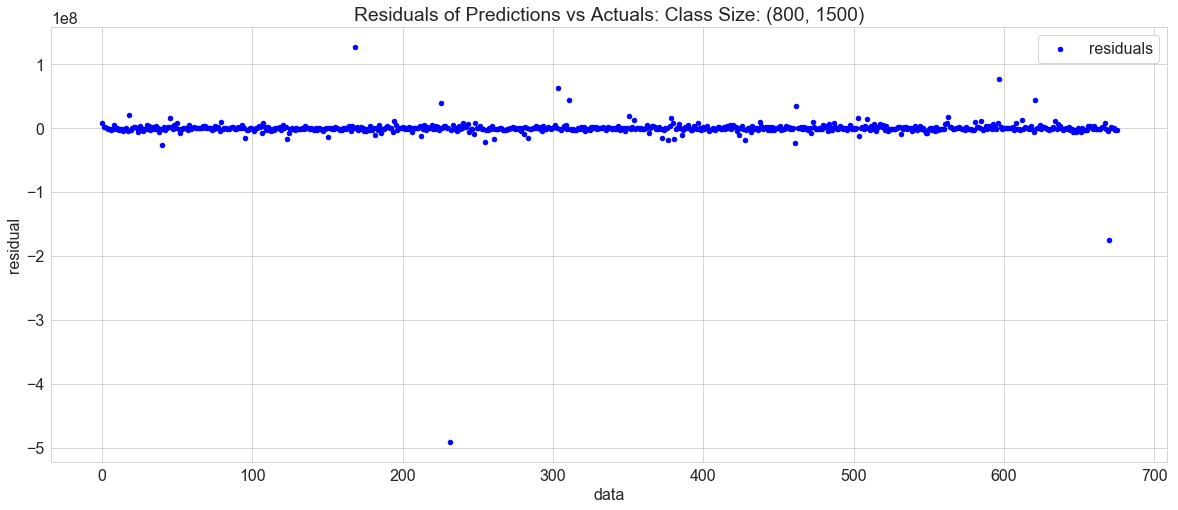

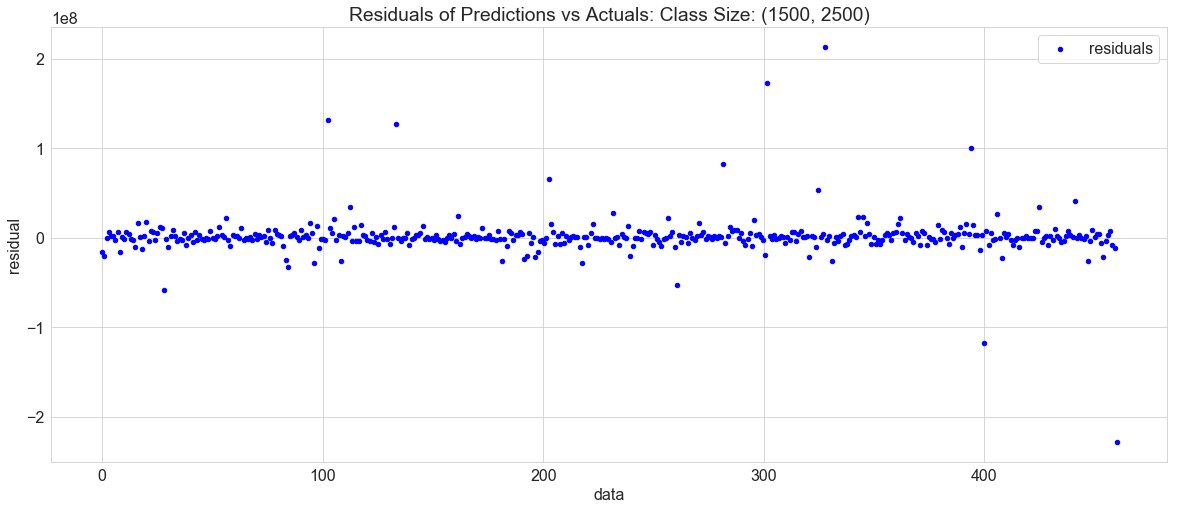

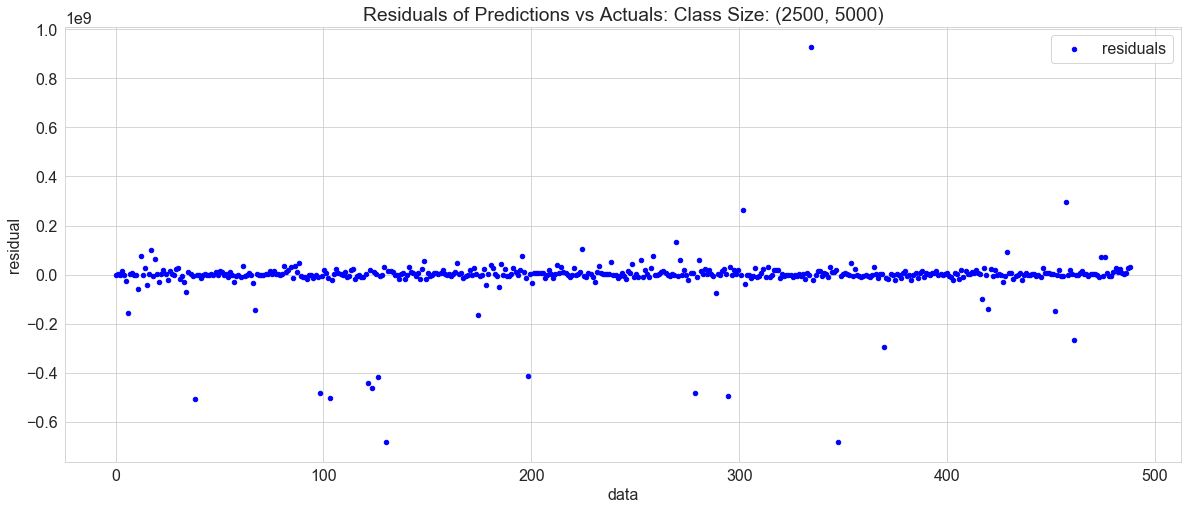

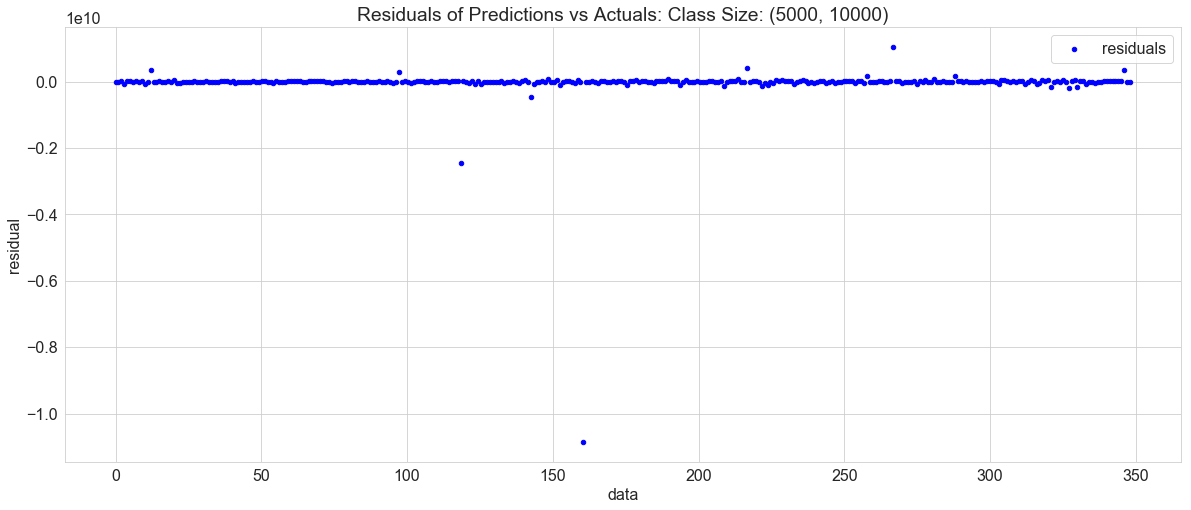

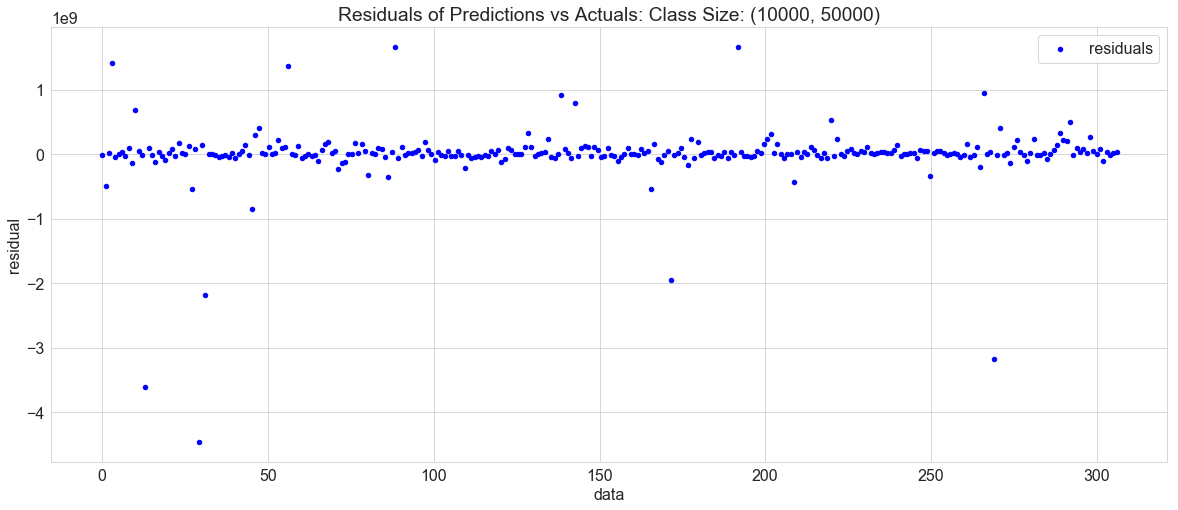

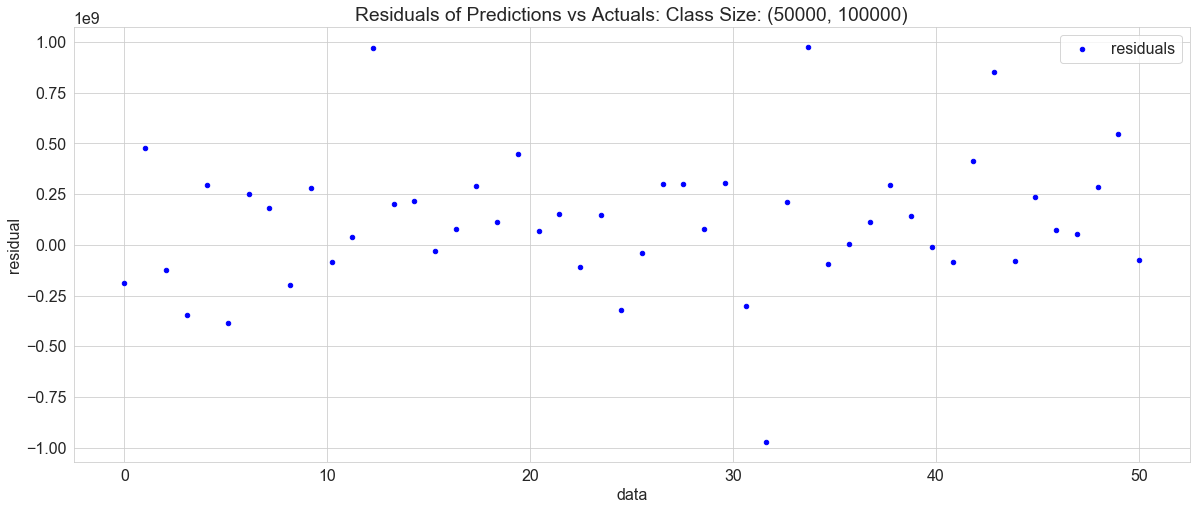

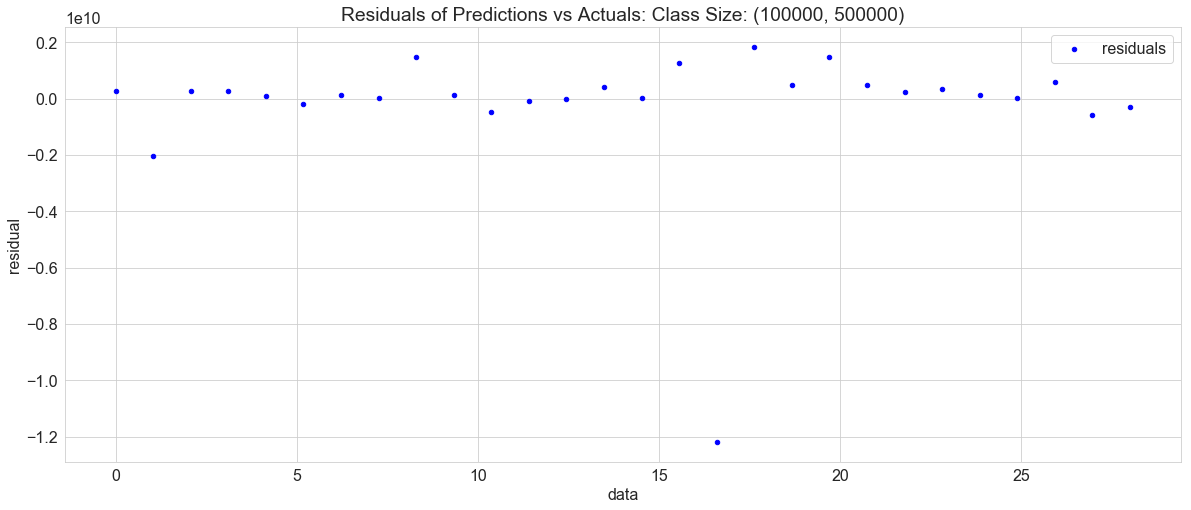

In [14]:
for i in partition_list:
    y_true = partitioned_dict_of_df_15[i][1]
    y_pred = predict_dict_15[i]
    plot_residuals(y_true, y_pred, i)

In [15]:
combined_15 = {}
for i in partition_list:
    combined_15[i] = pd.concat([partitioned_dict_of_df_15_more[i][0], \
                                pd.DataFrame(data=predict_dict_15[i],columns=['predicted_fndng_tgt_2016']), \
                                partitioned_dict_of_df_15_more[i][1]], 
                                axis=1)

In [18]:
for i in partition_list:
    combined_15[i]['partition'] = str(i)

In [19]:
combined_15[(300, 500)]

,eir,fndng_tgt_2015,tgt_nrml_cost_2015,pmts_to_part_2015,ein,pn,plan_name,sponsor_dfe_name,type_pension_bnft_code,eir_2016,eir_ft,eir_tnc,eir_pmt,diff_eir,predicted_fndng_tgt_2016,fndng_tgt_2016,partition
0,0.0627,21975942,65000.0,2740988.0,461783155,3,RA JONES & CO. SAVINGS AND INVESTMENT NON-BARG...,"RA JONES & CO., INC.",2E2G2J2K2R2S2T3D3H,0.0607,2.335383e+07,6.907550e+04,2.826918e+06,-0.0020,21975942.0,20836928.0,"(300, 500)"
1,0.0615,9795068,20000.0,831114.0,560481693,1,CAROLINA GLOVE 401(K) PLAN,CAROLINA GLOVE AND SAFETY COMPANY,2E2F2G2J2K2S2T3D,0.0595,1.039746e+07,2.123000e+04,8.566708e+05,-0.0020,10367173.0,9672725.0,"(300, 500)"
2,0.0631,9600119,0.0,2555250.0,580182880,1,CAPITAL CITY CLUB 401(K) PLAN,CAPITAL CITY CLUB,2E2F2G2J2S2T3D3H,0.0624,1.020589e+07,0.000000e+00,2.635868e+06,-0.0007,9563957.0,8186920.0,"(300, 500)"
3,0.0621,24524299,251089.0,1630920.0,470533731,1,DECKER COAL COMPANY 401(K) SAVINGS PLAN,DECKER COAL COMPANY,2E2F2G2J2K3D2T,0.0600,2.604726e+07,2.666816e+05,1.681560e+06,-0.0021,29122284.0,24738822.0,"(300, 500)"
4,0.0620,30813668,153000.0,2079463.0,370183365,1,401K PLAN FOR MISSISSIPPI LIME CO. STE. GENEVI...,MISSISIPPI LIME COMPANY,2E2F2G2J2K2T3D,0.0603,3.272412e+07,1.624860e+05,2.143926e+06,-0.0017,24164635.0,80403147.0,"(300, 500)"
5,0.0642,28230906,539438.0,1018887.0,133744485,1,"VALEO ELECTRICAL SYSTEMS, INC. SAVINGS PLAN FO...","VALEO ELECTRICAL SYSTEMS, INC.",2E2F2G2J2T3F3H,0.0623,3.004333e+07,5.740699e+05,1.051593e+06,-0.0019,32301354.0,30162926.0,"(300, 500)"
6,0.0631,8275652,197000.0,378415.0,240792115,1,JERSEY SHORE HOSPITAL RETIREMENT INCOME PLAN,JERSEY SHORE HOSPITAL,1A1G1I3D3F3H,0.0610,8.797846e+06,2.094307e+05,3.903540e+05,-0.0021,8266144.0,8516532.0,"(300, 500)"
7,0.0627,11777258,76200.0,600319.0,621716160,1,KOLBERG-PIONEER EMPLOYEES' RETIREMENT PLAN,"KOLBERG-PIONEER, INC.",1A1B1G1I3H,0.0607,1.251569e+07,8.097774e+04,6.191390e+05,-0.0020,4241540.0,12182228.0,"(300, 500)"
8,0.0607,6558361,88729.0,657425.0,363104688,111,"UNION TANK CAR CO EAST CHICAGO, IN HOURLY EMPL...",UNION TANK CAR COMPANY,1B1D1G3H1I,0.0586,6.956454e+06,9.411485e+04,6.773778e+05,-0.0021,20887060.0,6269165.0,"(300, 500)"
9,0.0642,8561160,87411.0,1228973.0,310987416,1,PEOPLES BANCORP INC. RETIREMENT PLAN AND TRUST,PEOPLES BANCORP INC.,1A1C1G1I3H,0.0624,9.110786e+06,9.302279e+04,1.268423e+06,-0.0018,11040059.0,7968644.0,"(300, 500)"


In [12]:
for i in partition_list:
    print(partitioned_dict_of_df_15_more[i][0].index, pd.DataFrame(data=predict_dict_15[i],columns=['predicted_fndng_tgt_2016']).index)

RangeIndex(start=0, stop=1466, step=1) RangeIndex(start=0, stop=1466, step=1)
RangeIndex(start=0, stop=672, step=1) RangeIndex(start=0, stop=672, step=1)
RangeIndex(start=0, stop=568, step=1) RangeIndex(start=0, stop=568, step=1)
RangeIndex(start=0, stop=675, step=1) RangeIndex(start=0, stop=675, step=1)
RangeIndex(start=0, stop=460, step=1) RangeIndex(start=0, stop=460, step=1)
RangeIndex(start=0, stop=488, step=1) RangeIndex(start=0, stop=488, step=1)
RangeIndex(start=0, stop=348, step=1) RangeIndex(start=0, stop=348, step=1)
RangeIndex(start=0, stop=306, step=1) RangeIndex(start=0, stop=306, step=1)
RangeIndex(start=0, stop=50, step=1) RangeIndex(start=0, stop=50, step=1)
RangeIndex(start=0, stop=28, step=1) RangeIndex(start=0, stop=28, step=1)


In [16]:
for i in partition_list:
    combined_15[i] = pd.concat([combined_15[i], partitioned_dict_of_df_15_more[i][1]], 
                                axis=1, join='inner')

In [36]:
new_df = combined_15[partition_list[0]]
for i in partition_list[1:]:
    new_df.append(combined_15[i])

In [39]:
new_df

,eir,fndng_tgt_2015,tgt_nrml_cost_2015,pmts_to_part_2015,ein,pn,plan_name,sponsor_dfe_name,type_pension_bnft_code,eir_2016,eir_ft,eir_tnc,eir_pmt,diff_eir,predicted_fndng_tgt_2016,fndng_tgt_2016
0,0.0638,12386152,408933.0,307189.0,730130930,1,RETIREMENT PLAN FOR EMPLOYEES OF FIRST NATIONA...,FIRST NATIONAL BANK AND TRUST COMPANY,1A1F2E2G2J2K2S2T1C,0.0618,1.317639e+07,4.350229e+05,3.169883e+05,-0.0020,19749155.0,13633798.0
1,0.0647,18089368,1140785.0,176577.0,112135246,1,ROTORK 401(K) PLAN,"ROTORK CONTROLS, INC.",2E2F2G2J2K2S2T3D3H,0.0627,1.925975e+07,1.214594e+06,1.822893e+05,-0.0020,11283134.0,20872914.0
2,0.0634,7962361,0.0,818707.0,140923640,1,NEW YORK STATE BAR ASSOCIATION 401(K) PROFIT S...,NEW YORK STATE BAR ASSOCIATION,2A2E2F2G2T2J2K3D,0.0612,8.467175e+06,0.000000e+00,8.446600e+05,-0.0022,11283134.0,7954306.0
3,0.0630,12717128,152125.0,520471.0,640183970,2,JOURNAL PUBLISHING CO. 401(K) SAVINGS PLAN,JOURNAL PUBLISHING COMPANY,2E2F2G2J2K2S2T3D,0.0610,1.351831e+07,1.617089e+05,5.368658e+05,-0.0020,13919079.0,13401759.0
4,0.0650,12823223,1168907.0,546530.0,421469363,1,NCMIC GROUP INC RETIREMENT SAVINGS PLAN,NCMIC GROUP INC,2E2F2G2J2K2T3D3H,0.0632,1.365673e+07,1.244886e+06,5.642922e+05,-0.0018,8337642.0,14886090.0
5,0.0621,4097951,0.0,466633.0,760471782,2,CONTINENTAL CARBON COMPANY RETIREMENT SAVINGS ...,CONTINENTAL CARBON COMPANY NON-BARGAINING EMPL...,2E2F2G2J2K2T3D3H,0.0601,4.352434e+06,0.000000e+00,4.811220e+05,-0.0020,4225700.0,3964134.0
6,0.0613,7505132,0.0,791595.0,271088874,1,"A. RAYMOND CORPORATE NA, INC. 401(K) PLAN","A. RAYMOND CORPORATE NA, INC.",2E2F2G2J2K2T3D3H,0.0594,7.965197e+06,0.000000e+00,8.158574e+05,-0.0019,7888753.0,7260009.0
7,0.0644,7575676,48880.0,123656.0,760607593,1,"M & G POLYMERS USA, LLC SAVINGS PLAN FOR SALAR...","M & G POLYMERS USA, LLC",2A2E2F2G2J2T3D3H,0.0624,8.063550e+06,5.202787e+04,1.276377e+05,-0.0020,7638310.0,8436221.0
8,0.0626,5308428,0.0,332148.0,461087585,1,CSM NA 401(K) PLAN,"CSM BAKERY PRODUCTS NA, INC.",2E2G2J2K2S2T3D,0.0605,5.640736e+06,0.000000e+00,3.425442e+05,-0.0021,6039004.0,5476972.0
9,0.0587,6097342,0.0,9694345.0,750800661,1,METHODIST HEALTH SYSTEM EMPLOYEE RETIREMENT PLAN,METHODIST HOSPITALS OF DALLAS,1F2F2G2K2T3F3H,0.0561,6.455256e+06,0.000000e+00,9.978874e+06,-0.0026,2219208.0,5626437.0


In [ ]:
prelim_df = get_data(2015)

In [ ]:
df = clean_data(prelim_df, 2015)

<h1>Test on 2016 data:</h1>
<ul>
    <li>Get data
    <li>create dictionary of predictions
    <li>graph actual values vs predictions
    </ul>

In [ ]:
partitioned_dict_of_df_16 = partition_feats_by_ptp_cnt(2016)

In [ ]:
partitioned_dict_of_df_16_more = partition_more_feats_by_ptp_cnt(2016)

In [ ]:
for i in partition_list:
    print('{} :'.format(i),len(partitioned_dict_of_df_16[i][0]))

In [ ]:
predict_dict_16 = {}
for i in partition_list[1:]:
    X, y = partitioned_dict_of_df_16[i]
    predict_dict_16[i] = model_dict[i].predict(X)

In [ ]:
for i in partition_list[1:]:
    y_true = partitioned_dict_of_df_16[i][1]
    y_pred = predict_dict_16[i]
    plot_results(y_true, y_pred, i, 2016)

In [ ]:
for i in partition_list[1:]:
    y_true = partitioned_dict_of_df_16[i][1]
    y_pred = predict_dict_16[i]
    plot_residuals(y_true, y_pred, i)